In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.data')
df = parkinsons_data

In [ ]:

assert pd.notnull(df).all().all()

**Data Things**

In [ ]:
parkinsons_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


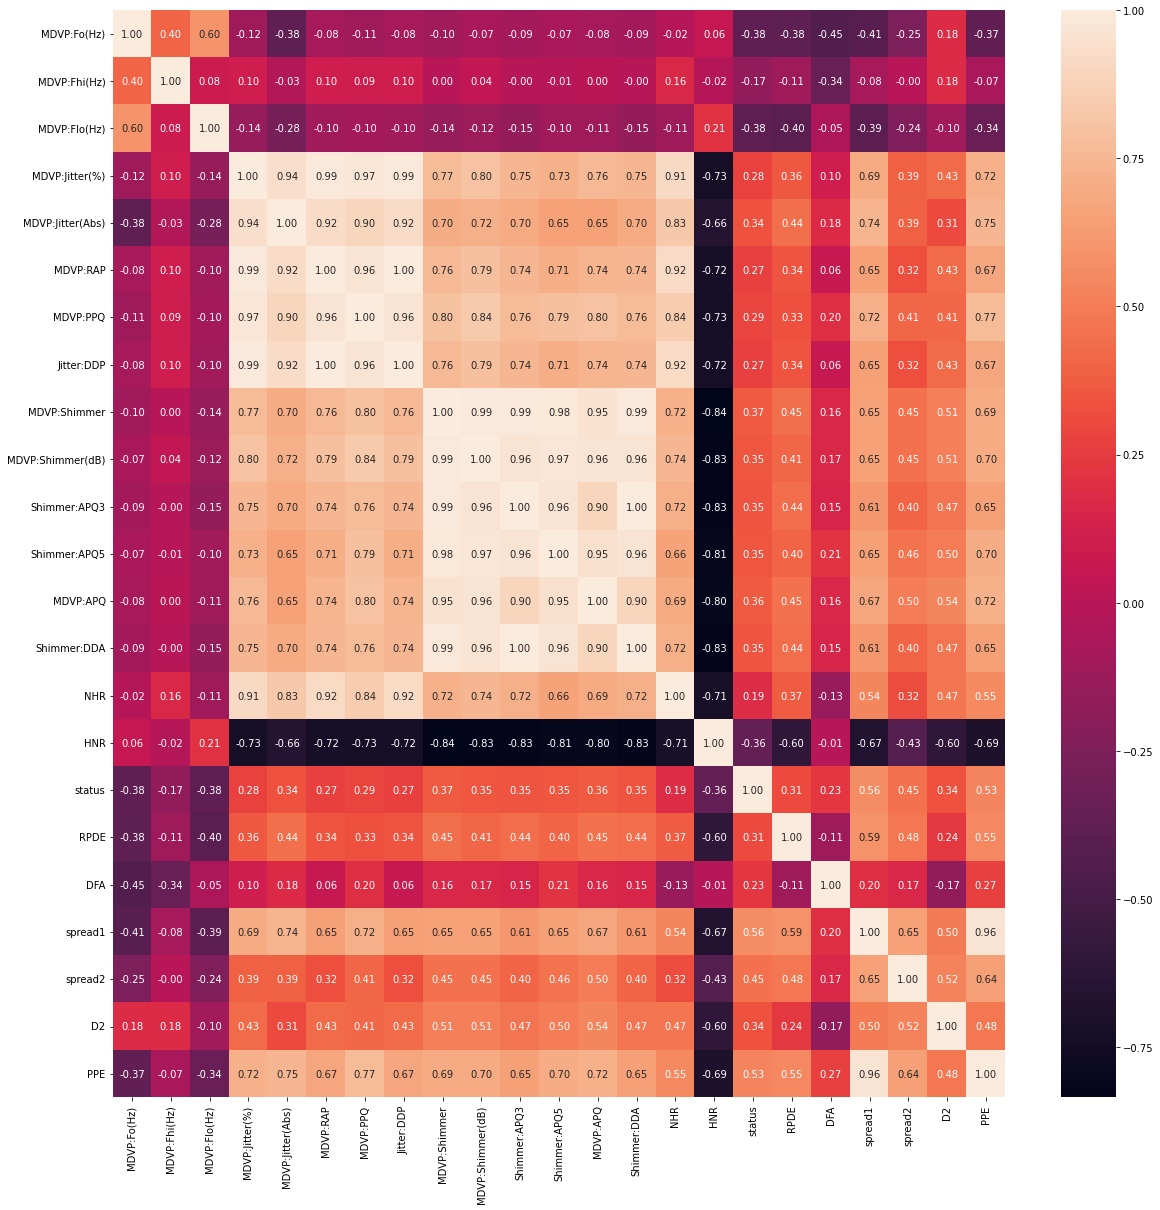

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(parkinsons_data.corr(), annot = True, fmt= '.2f')
plt.show()

In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1 --> Parkinson's Positive

0 --> Healthy

In [ ]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Data Pre-Processing**

In [ ]:
#Separating the features & Target
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X.head(3))

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  

In [ ]:
Y.head(3)

0    1
1    1
2    1
Name: status, dtype: int64

**Splitting the data to training data & Test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


**Model Training**
---

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

test = LogisticRegression(max_iter=10000)

test.fit(X_train, y_train) 
print('Train Accuracy: ', test.score(X_train, y_train))

pred = test.predict(X_test)
    
print('f1 Score: ', f1_score(pred, y_test))
print('Test Accuracy: ', accuracy_score(pred, y_test))


Train Accuracy:  0.8525641025641025
f1 Score:  0.9411764705882353
Test Accuracy:  0.8974358974358975


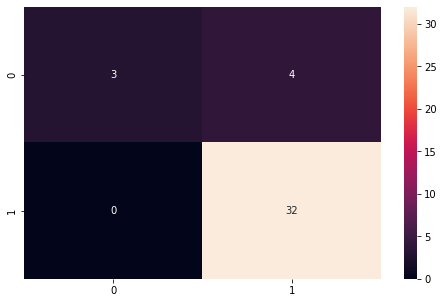

In [ ]:
cm = confusion_matrix(y_test, pred)
cm


plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);

**Cross Val Score**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 30)

cross_val_score(LogisticRegression(max_iter=1000),X,Y,cv=cv)

array([0.8974359 , 0.87179487, 0.82051282, 0.92307692, 0.8974359 ])

---



---

**Feature Selection**
--

---



---



Now we are going to select best features using **SelectKBest**


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

test_selector = SelectKBest(f_classif).fit(X_train, y_train)

features = pd.DataFrame({'Features': list(X_train.columns), "Score": test_selector.scores_})
features.sort_values(by='Score', ascending=False)

,Features,Score
18,spread1,73.263142
21,PPE,63.327413
19,spread2,40.337602
0,MDVP:Fo(Hz),28.878435
15,HNR,27.195298
2,MDVP:Flo(Hz),26.144013
8,MDVP:Shimmer,25.368770
12,MDVP:APQ,24.585941
20,D2,24.583667
11,Shimmer:APQ5,23.643784


In [ ]:
selector = SelectKBest(f_classif, k=3).fit(X_train, y_train)
train_selected = selector.transform(X_train)
test_selected = selector.transform(X_test)



In [ ]:
clf = LogisticRegression(max_iter=1000)

clf.fit(train_selected, y_train) 
print('Train Accuracy: ', clf.score(train_selected, y_train))
pred = clf.predict(test_selected)
    
print('Test Accuracy: ', accuracy_score(pred, y_test))

    
print('f1 Score: ', f1_score(pred, y_test))



Train Accuracy:  0.8397435897435898
Test Accuracy:  0.9230769230769231
f1 Score:  0.955223880597015


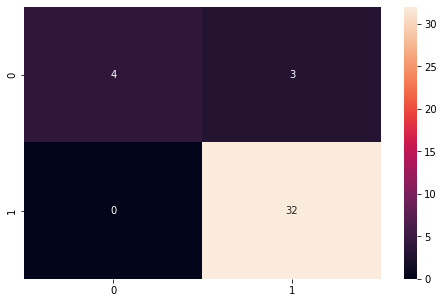

In [ ]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



`Logistic Regression `

*   Train Accuracy:  0.8525641025641025
*   f1 Score:  0.9411764705882353
*   Test Accuracy:  0.8974358974358975

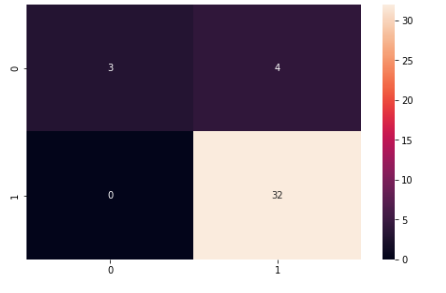

**FeatureSelection**
`Logistic Regression with SelectKbest( best of 3 features) `

*   Train Accuracy:  0.8397435897435898
*   f1 Score:  0.9230769230769231
*   Test Accuracy:  0.955223880597015

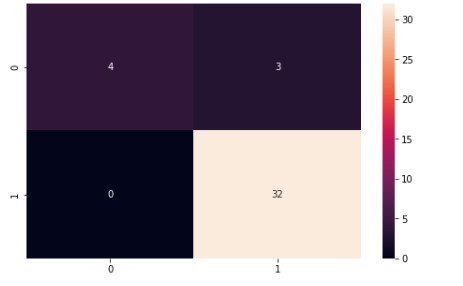




---



---

**Feature Extraction**
--

---



---



**PCA**

With 3 components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95) #retain 95 percent of useful features
X_pca = pca.fit_transform(X)
X_pca.shape


(195, 3)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test =train_test_split(X_pca,Y,test_size = 0.2, random_state = 30)

Train Accuracy:  0.8653846153846154
Test Accuracy:  0.8974358974358975
f1 Score:  0.9411764705882353


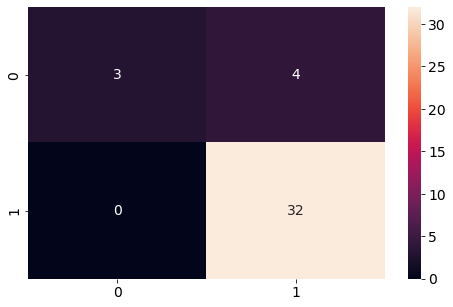

In [ ]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_pca,y_train)
print('Train Accuracy: ', model.score(X_train_pca, y_train))

#print(model.score(X_test_pca,y_test))
pred = model.predict(X_test_pca)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))

#Confusion matrix
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);

With 10 components

In [ ]:
pca = PCA(n_components=10)#we have 10 PCA
X_pca = pca.fit_transform(X)
X_pca.shape

(195, 10)

Train Accuracy:  0.8653846153846154
Test Accuracy:  0.8974358974358975
f1 Score:  0.9411764705882353


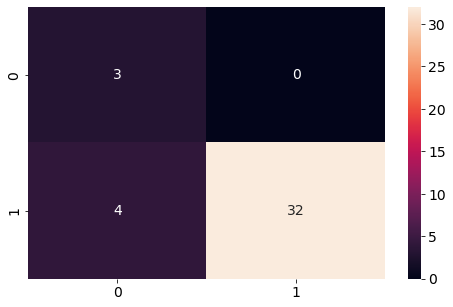

In [ ]:
X_train_pca, X_test_pca, y_train, y_test =train_test_split(X_pca,Y,test_size = 0.2, random_state = 30)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_pca,y_train)
print('Train Accuracy: ', model.score(X_train_pca, y_train))


pred = model.predict(X_test_pca)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))

#Consusion Matrix
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);

sns.pairplot(parkinsons_data, hue="PPE")
plt.show()

sns.pairplot(parkinsons_data, hue="status")
plt.show()




---



---

**Feature Selection with Feature Importance**
---


---



---

**With LGBMClassifier model**

In [ ]:
!pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# featuretools for automated feature engineering
import featuretools as ft

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# memory management
import gc

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


In [ ]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [ ]:
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X, Y, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.420964	valid_0's auc: 0.97488
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.370865	valid_0's auc: 0.952703


In [ ]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
19,spread2,7.5
12,MDVP:APQ,7.0
20,D2,7.0
21,PPE,6.5
0,MDVP:Fo(Hz),6.0


In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(7)

There are 6 features with 0.0 importance


,feature,importance
2,MDVP:Flo(Hz),0.5
10,Shimmer:APQ3,0.0
4,MDVP:Jitter(Abs),0.0
6,MDVP:PPQ,0.0
7,Jitter:DDP,0.0
3,MDVP:Jitter(%),0.0
13,Shimmer:DDA,0.0


In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

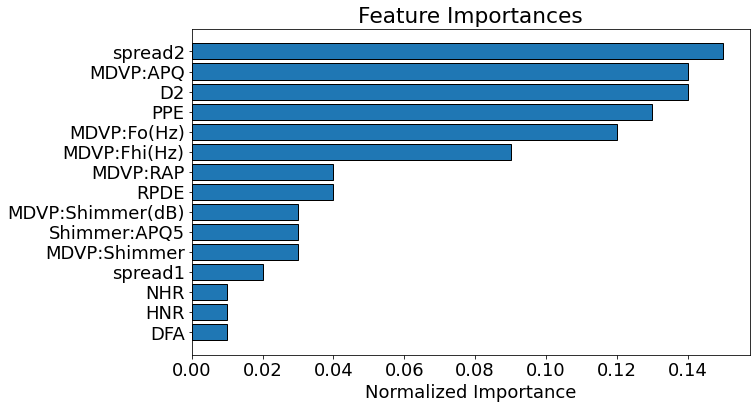

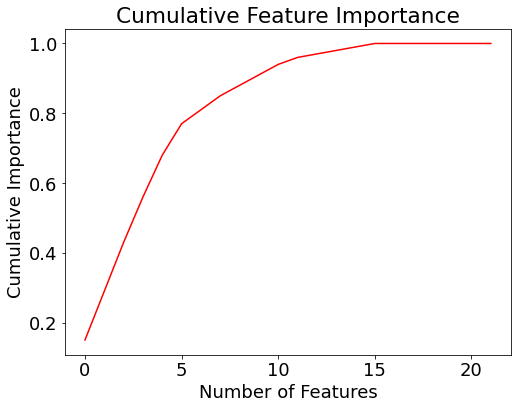

10 features required for 0.90 of cumulative importance


In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances)

**Let's remove the features that have zero importance.**

In [ ]:
print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)
print('Testing shape: ', y_train.shape)
print('Testing shape: ', y_test.shape)

Training shape:  (156, 22)
Testing shape:  (39, 22)
Testing shape:  (156,)
Testing shape:  (39,)


In [ ]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
print('Train Accuracy: ', model.score(X_train, y_train))
#print(model.score(X_test,y_test))

pred = model.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))

Train Accuracy:  0.7371794871794872
Test Accuracy:  0.8205128205128205
f1 Score:  0.9014084507042254


In [ ]:
train_x = X_train.drop(columns = zero_features)
train_y = y_train.drop(columns = zero_features)
test_x = X_test.drop(columns = zero_features)
test_y = y_test.drop(columns = zero_features)

print('Training shape: ', train_x.shape)
print('Testing shape: ', train_y.shape)
print('Testing shape: ', test_x.shape)
print('Testing shape: ', test_y.shape)

Training shape:  (156, 16)
Testing shape:  (156,)
Testing shape:  (39, 16)
Testing shape:  (39,)


Train Accuracy:  0.7371794871794872
Test Accuracy:  0.8205128205128205
f1 Score:  0.9014084507042254


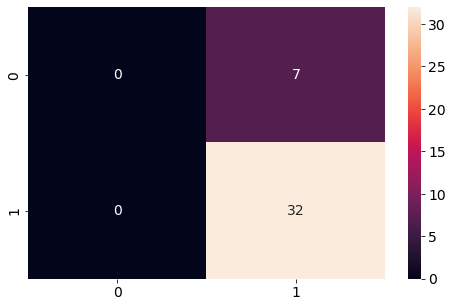

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


model = LogisticRegression(max_iter = 1000)
model.fit(train_x,train_y)
print('Train Accuracy: ', model.score(train_x, train_y))


pred = model.predict(test_x)

print('Test Accuracy: ', accuracy_score(pred, test_y))    
print('f1 Score: ', f1_score(pred, test_y))

cm = confusion_matrix(test_y, pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);

**With ExtraTreesClassifier**

In [ ]:
#import libraries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

#Fit the model
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print('Train Accuracy: ', model.score(X_train, y_train))
pred = model.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))




Train Accuracy:  1.0
Test Accuracy:  0.8205128205128205
f1 Score:  0.8955223880597014


In [ ]:
print(model.feature_importances_)

[0.03982101 0.03264173 0.03869594 0.0500433  0.03669612 0.04294689
 0.04185228 0.04714376 0.04431479 0.04795075 0.04521017 0.04421254
 0.0488399  0.04937702 0.0427114  0.05177755 0.04751654 0.04726953
 0.04988161 0.0600898  0.04087853 0.05012884]


<BarContainer object of 22 artists>

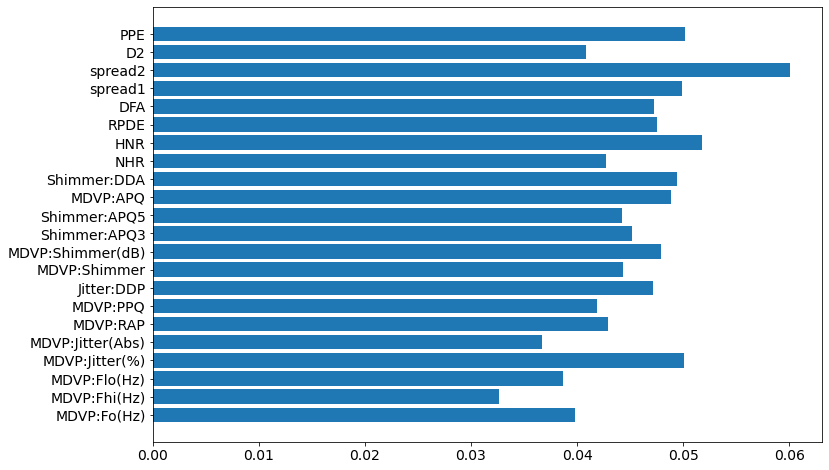

In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(X.columns, model.feature_importances_)

Text(0.5, 0, 'ExtraTreesClassifier Feature Importance')

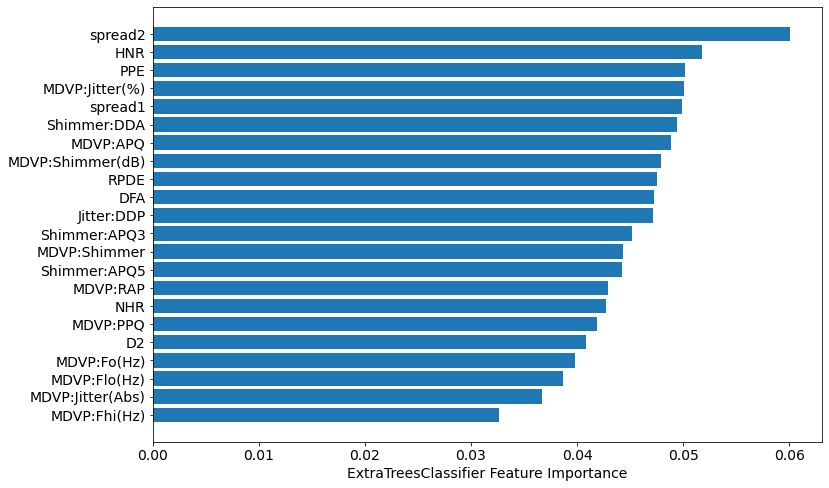

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("ExtraTreesClassifier Feature Importance")

We got the #1 best feature on FeatureImportance.


In [ ]:
X_train_extraTree = X_train[['spread2']]
X_test_extraTree = X_test[['spread2']]

#model = ExtraTreesClassifier()
model.fit(X_train_extraTree,y_train)
print(model.feature_importances_)
###
print('Train Accuracy: ', model.score(X_train_extraTree, y_train))
pred = model.predict(X_test_extraTree)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))

[1.]
Train Accuracy:  1.0
Test Accuracy:  0.7435897435897436
f1 Score:  0.84375


We picked the top 4 features on FeatureImportance

In [ ]:
X_train_extraTree = X_train[['spread2','HNR','PPE','MDVP:Jitter(%)']]
X_test_extraTree = X_test[['spread2','HNR','PPE','MDVP:Jitter(%)']]

#model = ExtraTreesClassifier()
model.fit(X_train_extraTree,y_train)
print(model.feature_importances_)
###
print('Train Accuracy: ', model.score(X_train_extraTree, y_train))
pred = model.predict(X_test_extraTree)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))

[0.24475879 0.26484998 0.25935308 0.23103815]
Train Accuracy:  1.0
Test Accuracy:  0.8461538461538461
f1 Score:  0.911764705882353


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Random Forest Importance**

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

###
print('Train Accuracy: ', rf.score(X_train, y_train))
pred = rf.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))


Train Accuracy:  1.0
Test Accuracy:  0.8717948717948718
f1 Score:  0.927536231884058


In [ ]:
rf.feature_importances_

array([0.02869438, 0.05138043, 0.04413276, 0.04577709, 0.01442283,
       0.04307126, 0.04250757, 0.04068036, 0.04442066, 0.04377579,
       0.05095567, 0.04698376, 0.05126405, 0.03969309, 0.05329119,
       0.06115688, 0.04504509, 0.05121422, 0.0460564 , 0.05503288,
       0.04426592, 0.05617772])

<BarContainer object of 22 artists>

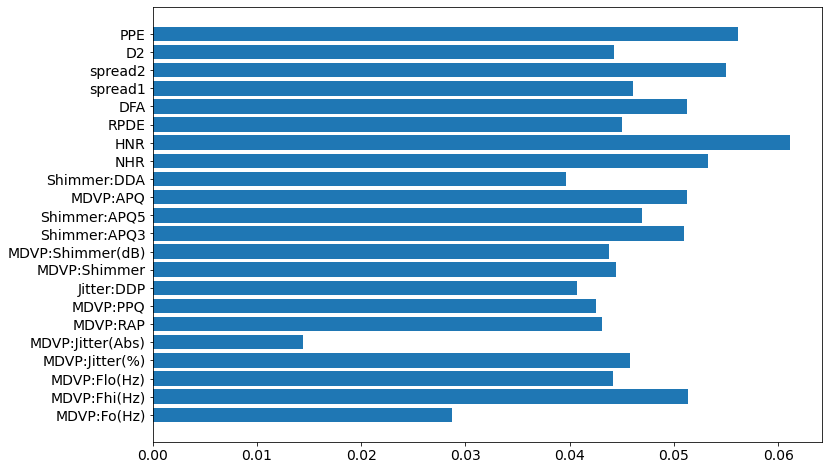

In [ ]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

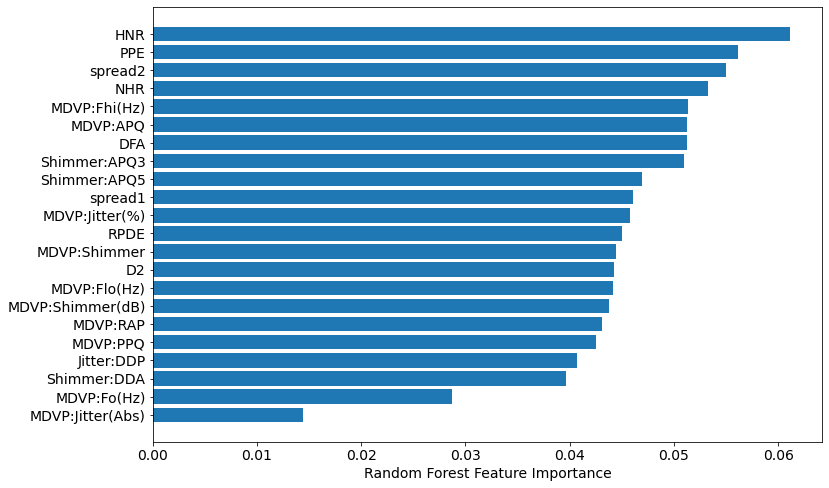

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

With RandomForest FeatureImportance, we will take the 3 best features


[0.3446638  0.33897489 0.31636131]
Train Accuracy:  1.0
Test Accuracy:  0.8974358974358975
f1 Score:  0.9411764705882353


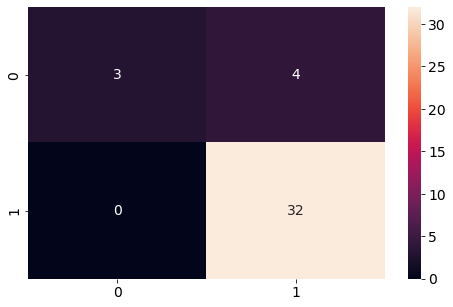

In [ ]:
X_train_randomForest = X_train[['HNR','PPE','spread2']]
X_test_ranfomForest = X_test[['HNR','PPE','spread2']]

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train_randomForest,y_train)
print(model.feature_importances_)
###
print('Train Accuracy: ', model.score(X_train_randomForest, y_train))
pred = model.predict(X_test_ranfomForest)

print('Test Accuracy: ', accuracy_score(pred, y_test))    
print('f1 Score: ', f1_score(pred, y_test))

cm = confusion_matrix(test_y, pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);